In [1]:
# Set up the environment with necessary imports
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from IPython.display import Image, display, HTML

# Set plot style
sns.set_style("whitegrid")

# mount drive
from google.colab import drive

drive.mount("/content/drive/")

DATA_DIRECTORY = "/content/drive/MyDrive/psych254a_2025/data"

Mounted at /content/drive/


# Linear Algebra and Multivariable Calculus with PyTorch

Linear algebra is fundamental to machine learning. In this lecture, we'll explore key concepts using PyTorch:

1. Matrices and vectors
2. Matrix operations
3. Dot products
4. Matrix multiplication
5. Transpose operations
6. Matrix-vector products
7. Matrix inverses

Let's get started!


## 1. Introduction to Matrices

Matrices are rectangular arrays of numbers arranged in rows and columns. They serve as the fundamental building blocks of linear algebra and are essential for understanding machine learning algorithms.


In [2]:
# Creating matrices in PyTorch
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

print("Matrix A:")
print(A)
print("\nShape of A:", A.shape)  # Returns (rows, columns)

Matrix A:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Shape of A: torch.Size([3, 3])


A matrix with dimensions m × n has m rows and n columns. We write this as A ∈ ℝ^(m×n).

- A matrix with the same number of rows and columns (m = n) is called a **square matrix**.
- A matrix with only one column is often called a **column vector**.
- A matrix with only one row is often called a **row vector**.


In [3]:
# Creating a column vector
column_vector = torch.tensor([[1], [2], [3]], dtype=torch.float32)
print("Column vector:\n", column_vector)
print("Shape:", column_vector.shape)  # (3, 1)

# Creating a row vector
row_vector = torch.tensor([[1, 2, 3]], dtype=torch.float32)
print("\nRow vector:\n", row_vector)
print("Shape:", row_vector.shape)  # (1, 3)

# In PyTorch, we can also create vectors as 1D tensors
vector = torch.tensor([1, 2, 3], dtype=torch.float32)
print("\n1D vector:\n", vector)
print("Shape:", vector.shape)  # (3,)

Column vector:
 tensor([[1.],
        [2.],
        [3.]])
Shape: torch.Size([3, 1])

Row vector:
 tensor([[1., 2., 3.]])
Shape: torch.Size([1, 3])

1D vector:
 tensor([1., 2., 3.])
Shape: torch.Size([3])


## Problem 1.1: Creating Matrices

Create the following matrices in PyTorch:

1. A 3×2 matrix with all elements set to 5
2. A 2×2 identity matrix
3. A 4×4 matrix with random values from a standard normal distribution


In [4]:
# Your code here
# 1. Create a 3×2 matrix with all elements set to 5


# 2. Create a 2×2 identity matrix


# 3. Create a 4×4 matrix with random values

## 2. Matrix Operations

### 2.1 Matrix Addition and Subtraction

Matrices of the same shape can be added or subtracted element-wise.


In [5]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
B = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

# Addition
C = A + B
print("\nA + B =")
print(C)

# Subtraction
D = A - B
print("\nA - B =")
print(D)

Matrix A:
tensor([[1., 2.],
        [3., 4.]])

Matrix B:
tensor([[5., 6.],
        [7., 8.]])

A + B =
tensor([[ 6.,  8.],
        [10., 12.]])

A - B =
tensor([[-4., -4.],
        [-4., -4.]])


### 2.2 Scalar Multiplication

Multiplying a matrix by a scalar (a single number) multiplies each element by that scalar.


In [6]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
scalar = 2.5

# Scalar multiplication
result = scalar * A
print(f"Matrix A:")
print(A)
print(f"\n{scalar} * A =")
print(result)

Matrix A:
tensor([[1., 2.],
        [3., 4.]])

2.5 * A =
tensor([[ 2.5000,  5.0000],
        [ 7.5000, 10.0000]])


## 3. Dot Products

The dot product is a fundamental operation between two vectors that results in a scalar value.

For two vectors a = [a₁, a₂, ..., aₙ] and b = [b₁, b₂, ..., bₙ], their dot product is defined as:

a · b = a₁b₁ + a₂b₂ + ... + aₙbₙ


In [7]:
a = torch.tensor([1, 2], dtype=torch.float32)
b = torch.tensor([3, 4], dtype=torch.float32)

# Dot product using torch.dot
dot_product = torch.dot(a, b)
print("Vector a:", a)
print("Vector b:", b)
print("a · b =", dot_product.item())  # 1*4 + 2*5 + 3*6 = 32

Vector a: tensor([1., 2.])
Vector b: tensor([3., 4.])
a · b = 11.0


Geometrically, the dot product relates to the cosine of the angle between vectors:

a · b = |a| |b| cos(θ)

where |a| and |b| are the magnitudes (lengths) of vectors a and b, and θ is the angle between them.

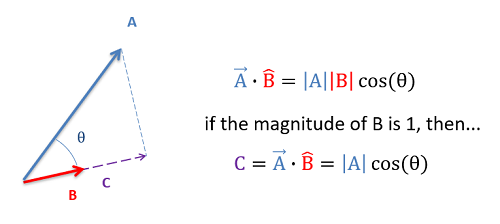

In [8]:
# displaying image
display(
    Image(os.path.join(DATA_DIRECTORY, "dotproduct.png"), width=500)
)
# Image source: Mechanics Map Digital Textbook

In [9]:
# Calculate magnitudes
magnitude_a = torch.norm(a)
magnitude_b = torch.norm(b)

# Calculate cosine of the angle between vectors
cosine = dot_product / (magnitude_a * magnitude_b)
angle_rad = torch.acos(cosine)
angle_deg = angle_rad * 180 / torch.pi

print(f"Magnitude of a: {magnitude_a.item():.4f}")
print(f"Magnitude of b: {magnitude_b.item():.4f}")
print(f"Cosine of the angle: {cosine.item():.4f}")
print(f"Angle between vectors: {angle_deg.item():.2f} degrees")
print(f"Dot product: {dot_product.item():.2f}")

Magnitude of a: 2.2361
Magnitude of b: 5.0000
Cosine of the angle: 0.9839
Angle between vectors: 10.30 degrees
Dot product: 11.00


When the vectors are orthogonal, the dot product is 0.


In [10]:
c = torch.tensor([1, 0], dtype=torch.float32)
d = torch.tensor([0, 1], dtype=torch.float32)

dot_product = torch.dot(c, d)
print(f"Dot product: {dot_product.item():.2f}")

Dot product: 0.00


## Problem 3.1: Working with Dot Products

Given the vectors u = [2, 3, -1] and v = [4, 0, 5]:

1. Compute the dot product u · v
2. Calculate the magnitudes |u| and |v|
3. Find the angle (in degrees) between u and v
4. Determine if u and v are orthogonal (perpendicular)


In [11]:
# Your code here
u = torch.tensor([2, 3, -1], dtype=torch.float32)
v = torch.tensor([4, 0, 5], dtype=torch.float32)

# 1. Compute the dot product with pytorch (hint: use torch.dot)


# 2. Calculate the magnitudes (hint: use torch.norm)


# 3. Find the angle between vectors (hint: use torch.acos)


# 4. Check if vectors are orthogonal (hint: use torch.isclose to check if the dot product is close to 0)

## 4. Matrix Multiplication

Matrix multiplication is a fundamental operation that combines two matrices to produce a new matrix.

For matrices A (m × n) and B (n × p), their product C = A × B is an m × p matrix where:

C[i,j] = Σₖ A[i,k] × B[k,j] (sum over k from 1 to n)

This means to get the element at position (i,j) in the result, we take the dot product of the ith row of A with the jth column of B.

**Note:** For matrix multiplication to be valid, the number of columns in the first matrix must equal the number of rows in the second matrix.

Here is a visual representation of matrix multiplication:


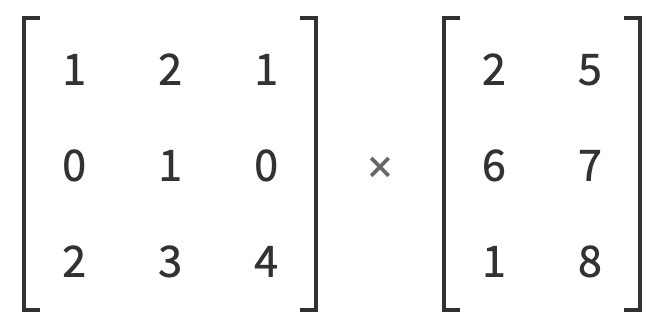

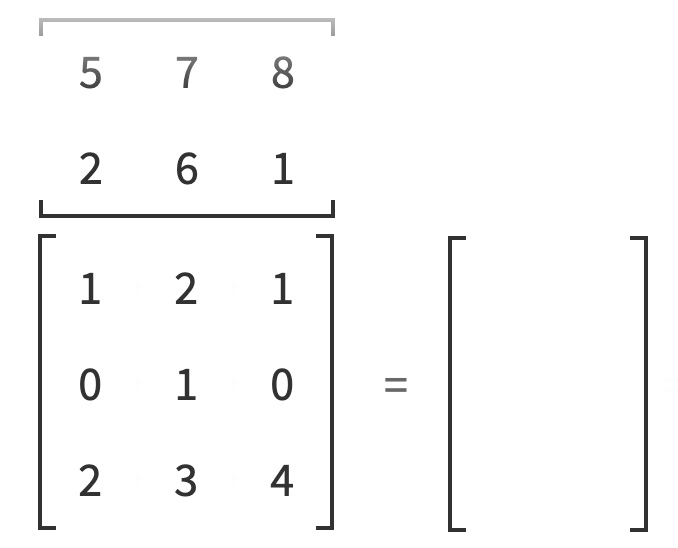

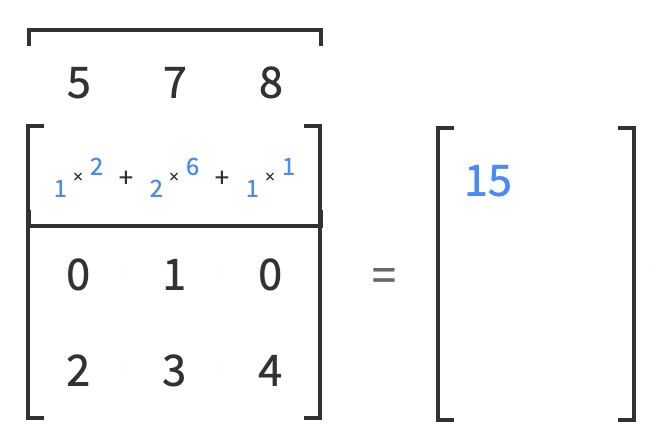

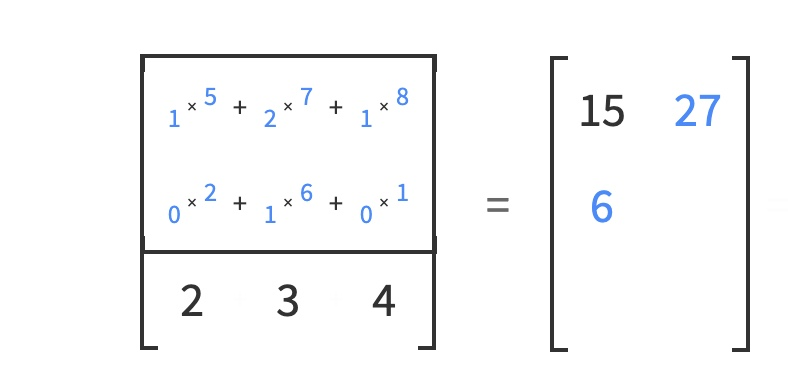

In [12]:
# displaying images
from IPython.display import Image
matmul_images = [os.path.join(DATA_DIRECTORY, f"matmul{i}.jpeg") for i in range(1, 5)]

display(
    Image(matmul_images[0], width=500),
    Image(matmul_images[1], width=500),
    Image(matmul_images[2], width=500),
    Image(matmul_images[3], width=500)
)

Feel free to explore more such examples of matrix multiplication here: https://matrixmultiplication.xyz

In [13]:
# now let's compute some matrix multiplications

A = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)  # 2x3 matrix

B = torch.tensor([[7, 8], [9, 10], [11, 12]], dtype=torch.float32)  # 3x2 matrix

print("Matrix A (2×3):")
print(A)
print("\nMatrix B (3×2):")
print(B)

# Matrix multiplication
C = torch.matmul(A, B)  # Also can use A @ B
print("\nA × B (2×2):")
print(C)

Matrix A (2×3):
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Matrix B (3×2):
tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])

A × B (2×2):
tensor([[ 58.,  64.],
        [139., 154.]])


Let's break down how to calculate just one element of the result:


In [18]:
# Calculate C[0,0] manually
# It's the dot product of A's first row and B's first column
row = A[0]  # [1, 2, 3]
col = B[:, 0]  # [7, 9, 11]
c_00 = torch.dot(row, col)
print(f"C[0,0] = {row} · {col} = {c_00.item()}")

# Calculate C[0,1] manually
row = A[0]  # [1, 2, 3]
col = B[:, 1]  # [8, 10, 12]
c_01 = torch.dot(row, col)
print(f"C[0,1] = {row} · {col} = {c_01.item()}")

C[0,0] = tensor([1., 2., 3.]) · tensor([ 7.,  9., 11.]) = 58.0
C[0,1] = tensor([1., 2., 3.]) · tensor([ 8., 10., 12.]) = 64.0


## Problem 4.1: Matrix Multiplication

Given the following matrices:

```
P = [[2, 0],
     [3, 4],
     [1, -1]]

Q = [[5, 1, 2],
     [-2, 3, 7]]
```

1. Determine if P × Q is valid, and if so, compute it
2. Determine if Q × P is valid, and if so, compute it
3. For any result obtained, manually verify one element by calculating the dot product


In [19]:
# Your code here
# Define the matrices


# 1. Compute P × Q if valid


# 2. Compute Q × P if valid


# 3. Manually verify one element

## 5. Matrix Transpose

The transpose of a matrix A, denoted as Aᵀ, flips the matrix over its diagonal, switching the row and column indices.

For a matrix A with elements A[i,j], the transpose Aᵀ has elements Aᵀ[j,i] = A[i,j].


In [20]:
A = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)  # 2x3 matrix

AT = A.T  # or A.transpose(0, 1)
print("Matrix A (2×3):")
print(A)
print("\nAᵀ (3×2):")
print(AT)

Matrix A (2×3):
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Aᵀ (3×2):
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## Problem 5.1: Working with Transposes

Given the matrix:

```
M = [[3, -1, 2],
     [0, 4, 5]]
```

1. Compute the transpose of M
2. Define N = MᵀM and compute its value
3. Is N a square matrix? Is it symmetric (equal to its own transpose)?


In [21]:
# Your code here
# Define the matrix M


# 1. Compute the transpose of M


# 2. Compute N = MᵀM


# 3. Check if N is symmetric

## 6. Matrix-Vector Product

A matrix-vector product is a special case of matrix multiplication where one of the matrices is a vector.

If A is an m × n matrix and x is an n-dimensional vector, then A × x is an m-dimensional vector.


In [22]:
A = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)  # 2x3 matrix

x = torch.tensor([7, 8, 9], dtype=torch.float32)  # 3-dimensional vector

# Matrix-vector product
b = A @ x  # or torch.matmul(A, x)
print("A =")
print(A)
print("\nx =", x)
print("\nA × x =", b)

A =
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x = tensor([7., 8., 9.])

A × x = tensor([ 50., 122.])


Each element of the resulting vector is the dot product of a row of the matrix with the vector:


In [23]:
# Calculate each element manually
b0 = torch.dot(A[0], x)
b1 = torch.dot(A[1], x)

print(f"b[0] = A[0] · x = {A[0]} · {x} = {b0.item()}")
print(f"b[1] = A[1] · x = {A[1]} · {x} = {b1.item()}")

b[0] = A[0] · x = tensor([1., 2., 3.]) · tensor([7., 8., 9.]) = 50.0
b[1] = A[1] · x = tensor([4., 5., 6.]) · tensor([7., 8., 9.]) = 122.0


Matrix-vector products are fundamental in machine learning, for example in linear regression:

### $y = Xw,$

where $X$ is the data matrix (each row is an observation with $d$ dimensions), $w$ is the weight vector, and $y$ is the prediction vector


## Further Resources

1. **Interactive Visualizations**:

   - [3Blue1Brown's Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) - Excellent visual explanations
   - [Interactive Linear Algebra](http://immersivemath.com/ila/index.html) - Visual, interactive textbook

2. **PyTorch Documentation**:

   - [PyTorch Linear Algebra Operations](https://pytorch.org/docs/stable/linalg.html)


# Calculus Review

In this section, we'll review key calculus concepts essential for machine learning:

1. Brief review of derivatives in one dimension
2. Taylor series approximations
3. Introduction to multivariable calculus
   - Gradients (multivariable first derivatives)
   - Hessian matrices (multivariable second derivatives)
   - Critical points in multiple dimensions


## 1. Brief Review of Derivatives in One Dimension

The derivative \(f'(x)\) measures the rate of change of a function \(f(x)\) at a point. Geometrically,
it represents the slope of the tangent line at that point. The second derivative \(f''(x)\) measures how this rate of change is itself changing (concavity).


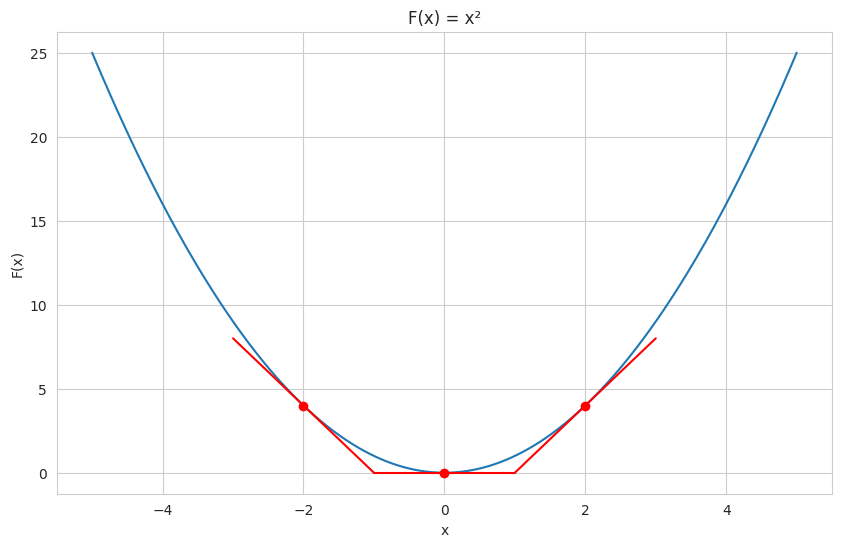

In [24]:
# Set up the environment with necessary imports
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Image, display, HTML

# Set plot style
sns.set_style("whitegrid")


# Define a helper function for plotting tangent lines
def line(m, b, x):
    """Linear function: f(x) = mx + b"""
    return m * x + b


# Function to plot a function and its tangent lines
def plot_func_and_slopes(
    F, dF, xvals, title, start=-5, stop=5, start_delta=-1, stop_delta=1
):
    x = torch.linspace(start, stop, 500)
    y = F(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)

    xvals = torch.tensor(xvals)
    slopes = dF(xvals)
    intercepts = F(xvals) - slopes * xvals

    slope_starts_x = xvals + start_delta
    slope_ends_x = xvals + stop_delta

    slope_starts_y = slopes * slope_starts_x + intercepts
    slope_ends_y = slopes * slope_ends_x + intercepts

    for i in range(len(xvals)):
        plt.plot(
            [slope_starts_x[i], slope_ends_x[i]],
            [slope_starts_y[i], slope_ends_y[i]],
            "r-",
        )
        plt.plot(xvals[i], F(xvals[i]), "ro")

    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.title(title)
    plt.grid(True)
    plt.show()


# Example: Plotting a function and its tangent lines
F = lambda x: x**2
dF = lambda x: 2 * x

plot_func_and_slopes(F, dF, xvals=[-2, 0, 2], title="F(x) = x²")

### Second Derivatives and Concavity

The second derivative \(f''(x)\) tells us about the concavity (curvature) of a function:

- If \(f''(x) > 0\), the function is concave up (shaped like ∪) and the slope is increasing
- If \(f''(x) < 0\), the function is concave down (shaped like ∩) and the slope is decreasing
- If \(f''(x) = 0\), the function might have an inflection point where concavity changes


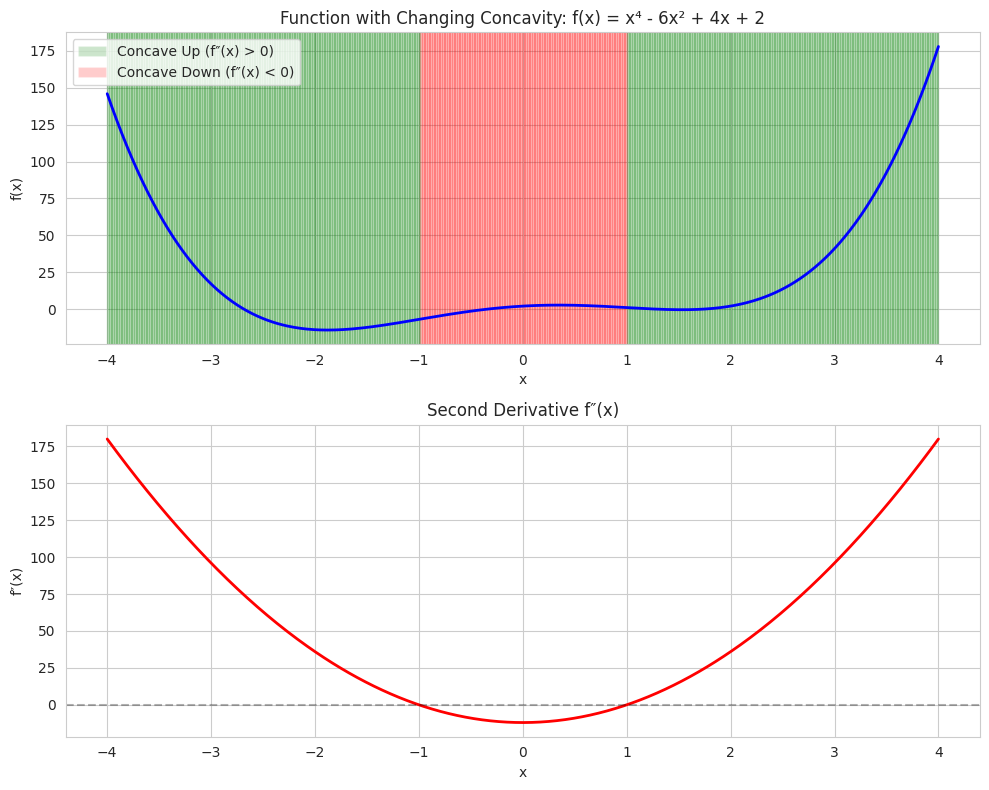

In [25]:
# Visualize second derivatives and concavity
def plot_function_with_concavity(F, dF, d2F, title, x_range=(-4, 4)):
    """
    Plot a function with regions of concavity highlighted

    Parameters:
    - F: function
    - dF: first derivative
    - d2F: second derivative
    - title: plot title
    - x_range: range for x-axis
    """
    x = torch.linspace(x_range[0], x_range[1], 500)
    y = F(x)
    dy = dF(x)
    d2y = d2F(x)

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the function with concavity regions
    ax1.plot(x, y, "b-", linewidth=2)

    # Color regions based on concavity
    for i in range(len(x) - 1):
        if d2F(x[i]) > 0:  # Concave up
            ax1.axvspan(x[i], x[i + 1], alpha=0.2, color="green")
        elif d2F(x[i]) < 0:  # Concave down
            ax1.axvspan(x[i], x[i + 1], alpha=0.2, color="red")

    # Add a legend
    concave_up = plt.Rectangle((0, 0), 1, 1, fc="green", alpha=0.2)
    concave_down = plt.Rectangle((0, 0), 1, 1, fc="red", alpha=0.2)
    ax1.legend(
        [concave_up, concave_down],
        ["Concave Up (f″(x) > 0)", "Concave Down (f″(x) < 0)"],
    )

    ax1.set_title(f"{title}")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(True)

    # Plot the second derivative
    ax2.plot(x, d2y, "r-", linewidth=2)
    ax2.axhline(y=0, color="k", linestyle="--", alpha=0.3)
    ax2.set_title("Second Derivative f″(x)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f″(x)")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


# Example: Function with changing concavity
F_example = lambda x: x**4 - 6 * x**2 + 4 * x + 2
dF_example = lambda x: 4 * x**3 - 12 * x + 4
d2F_example = lambda x: 12 * x**2 - 12

plot_function_with_concavity(
    F_example,
    dF_example,
    d2F_example,
    title="Function with Changing Concavity: f(x) = x⁴ - 6x² + 4x + 2",
)

## Problem 1.1: Derivatives and Tangent Lines

Consider the function \(f(x) = x^3 - 3x + 1\).

1. Calculate the derivative \(f'(x)\)
2. Evaluate the derivative at \(x = -1\), \(x = 0\), and \(x = 1\)
3. Interpret what the sign of the derivative tells you about the function at these points


In [28]:
# Your code here
# 1. Calculate the derivative
# f(x) = x^3 - 3x + 1
f = lambda x: x**3 - 3 * x + 1
df = lambda x: 3 * x**2 - 3

# 2. Evaluate the derivative at x = -1, x = 0, and x = 1
print(df(-1))
print(df(0))
print(df(1))

# 3. Interpret what the sign tells you

0
-3
0


## 2. Taylor Series Approximation

Taylor series allow us to approximate a function near a point \(a\) using polynomials:

$f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \ldots$

The more terms we include, the better the approximation becomes near point \(a\).


In [29]:
# Function to compute Taylor series approximation
def taylor_series(f, df_list, a, x, order):
    """
    Compute Taylor series approximation

    Parameters:
    - f: Original function
    - df_list: List of derivative functions [f', f'', f''', ...]
    - a: Point around which to approximate
    - x: Points at which to evaluate the approximation
    - order: Order of the approximation (0 = constant, 1 = linear, etc.)

    Returns:
    - Approximation of f(x) using Taylor series of specified order
    """
    result = f(torch.tensor(a)) * torch.ones_like(x)

    for n in range(1, order + 1):
        derivative_at_a = df_list[n - 1](torch.tensor(a))
        factorial = math.factorial(n)
        result += derivative_at_a * (x - a) ** n / factorial

    return result

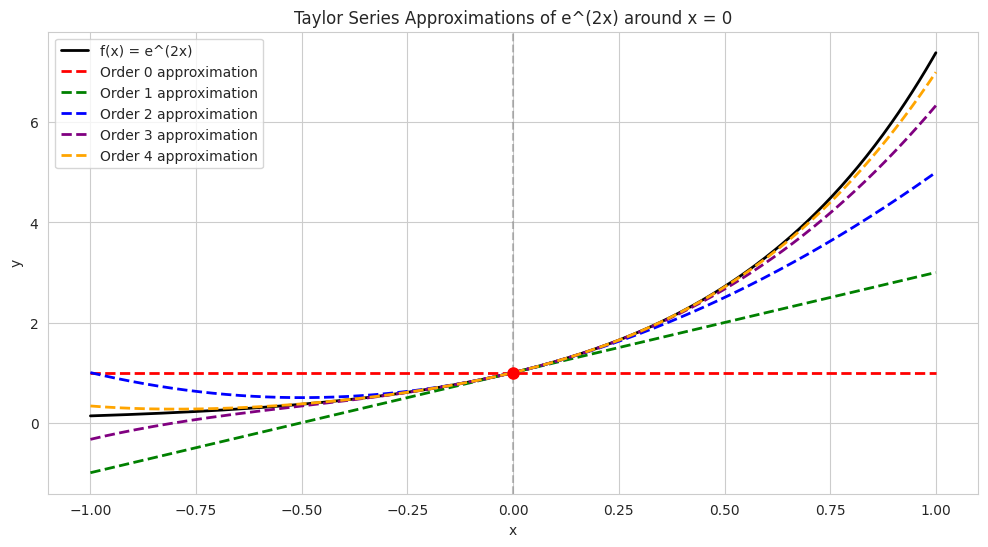

In [30]:
# Example: Taylor series approximation of e^(2x) around x = 0
def plot_taylor_approximations(f, df_list, a, orders, title, x_range=(-2, 2)):
    """
    Plot a function and its Taylor approximations of different orders

    Parameters:
    - f: Original function
    - df_list: List of derivative functions [f', f'', f''', ...]
    - a: Point around which to approximate
    - orders: List of orders to plot
    - title: Plot title
    - x_range: Range for x-axis
    """
    x = torch.linspace(x_range[0], x_range[1], 500)
    y_true = f(x)

    plt.figure(figsize=(12, 6))
    plt.plot(x, y_true, "k-", linewidth=2, label=f"f(x) = {title}")

    colors = ["red", "green", "blue", "purple", "orange"]
    for i, order in enumerate(orders):
        y_approx = taylor_series(f, df_list, a, x, order)
        plt.plot(
            x,
            y_approx,
            "--",
            linewidth=2,
            color=colors[i % len(colors)],
            label=f"Order {order} approximation",
        )

    plt.axvline(x=a, color="gray", linestyle="--", alpha=0.5)
    plt.plot(a, f(torch.tensor(a)), "ro", markersize=8)

    plt.title(f"Taylor Series Approximations of {title} around x = {a}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


# Original function e^(2x) and its derivatives
f_exp = lambda x: torch.exp(2 * x)
df_exp = lambda x: 2 * torch.exp(2 * x)
d2f_exp = lambda x: 4 * torch.exp(2 * x)
d3f_exp = lambda x: 8 * torch.exp(2 * x)
d4f_exp = lambda x: 16 * torch.exp(2 * x)

# List of derivatives
df_list_exp = [df_exp, d2f_exp, d3f_exp, d4f_exp]

# Plot Taylor approximations
plot_taylor_approximations(
    f_exp, df_list_exp, a=0, orders=[0, 1, 2, 3, 4], title="e^(2x)", x_range=(-1, 1)
)

## Problem 2.1: Taylor Series Approximation

Consider the function $f(x) = \sin(x)$.

1. Write out the Taylor series expansion of $f(x)$ around $a = 0$ up to the 5th order
2. Compute the derivatives $f'(x)$, $f''(x)$, $f'''(x)$, $f^{(4)}(x)$, and $f^{(5)}(x)$
3. Evaluate these derivatives at $x = 0$
4. Use the values to verify your Taylor series expansion


In [ ]:
# Your code here
# 1. Write out the Taylor series expansion

f_taylor = lambda x: f(x)

# 2. Compute the derivatives


# 3. Evaluate at x = 0


# 4. Verify your Taylor series


## 3. Introduction to Multivariable Calculus

In machine learning, we often work with functions of multiple variables. Understanding derivatives in higher dimensions is crucial for optimization algorithms like gradient descent.

### The Gradient: The Multivariable First Derivative

The gradient of a function $f(x, y)$ is a vector that points in the direction of steepest increase:

$ \nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} $

Each component is a partial derivative, measuring how the function changes when we vary only that variable.


In [ ]:
# Function to plot a 2D function and its gradient field
def plot_function_and_gradient(
    F, dF, title="", num_points=20, x_range=(-2, 2), y_range=(-2, 2)
):
    """
    Plot a 2D function and its gradient field

    Parameters:
    - F: Function F(x,y)
    - dF: Gradient function returning [∂F/∂x, ∂F/∂y]
    - title: Plot title
    - num_points: Number of points in the gradient field grid
    - x_range, y_range: Plot range
    """
    # Create meshgrid for 3D plot
    x_dense = torch.linspace(x_range[0], x_range[1], 100)
    y_dense = torch.linspace(y_range[0], y_range[1], 100)
    X_dense, Y_dense = torch.meshgrid(x_dense, y_dense, indexing="ij")
    Z_dense = torch.zeros(X_dense.shape)

    for i in range(X_dense.shape[0]):
        for j in range(X_dense.shape[1]):
            Z_dense[i, j] = F(X_dense[i, j], Y_dense[i, j])

    # Create sparser grid for gradient field
    x_sparse = torch.linspace(x_range[0], x_range[1], num_points)
    y_sparse = torch.linspace(y_range[0], y_range[1], num_points)
    X_sparse, Y_sparse = torch.meshgrid(x_sparse, y_sparse, indexing="ij")

    # Calculate gradients
    U = torch.zeros(X_sparse.shape)
    V = torch.zeros(Y_sparse.shape)

    for i in range(X_sparse.shape[0]):
        for j in range(X_sparse.shape[1]):
            grad = dF(X_sparse[i, j], Y_sparse[i, j])
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    # Create plot
    fig = plt.figure(figsize=(15, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    surf = ax1.plot_surface(
        X_dense.numpy(),
        Y_dense.numpy(),
        Z_dense.numpy(),
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
    )
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x,y)")
    ax1.set_title(f"Function: {title}")

    # Contour plot with gradient field
    ax2 = fig.add_subplot(1, 2, 2)
    contour = ax2.contourf(
        X_dense.numpy(), Y_dense.numpy(), Z_dense.numpy(), 20, cmap=cm.coolwarm
    )
    quiver = ax2.quiver(
        X_sparse.numpy(),
        Y_sparse.numpy(),
        U.numpy(),
        V.numpy(),
        color="black",
        scale=50,
        width=0.002,
    )
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title("Gradient Field")
    plt.colorbar(contour, ax=ax2)

    plt.tight_layout()
    plt.show()


# Example: Plot a simple function and its gradient field
F1 = lambda x, y: x**2 + y**2
dF1 = lambda x, y: torch.tensor([2 * x, 2 * y])

plot_function_and_gradient(F1, dF1, title="f(x,y) = x² + y²")

# Example: Plot another function and its gradient field
F2 = lambda x, y: torch.sin(x) + torch.cos(y)
dF2 = lambda x, y: torch.tensor([torch.cos(x), -torch.sin(y)])

plot_function_and_gradient(F2, dF2, title="f(x,y) = sin(x) + cos(y)")

## Problem 3.1: Gradients and Directional Derivatives

Consider the function $f(x, y) = 3x^2 + 2xy - y^2$.

1. Compute the gradient $\nabla f(x, y)$
2. Evaluate the gradient at the point $(1, 2)$
3. In which direction does the function increase most rapidly at $(1, 2)$?
4. Plot the function and its gradient field


In [ ]:
# Your code here
# 1. Compute the gradient
# f(x, y) = 3x^2 + 2xy - y^2

# 2. Evaluate the gradient at (1, 2)


# 3. Direction of steepest ascent at (1, 2)


# 4. Plot the function and its gradient field

### The Hessian Matrix: The Multivariable Second Derivative

The Hessian matrix is the matrix of second-order partial derivatives. For a function \(f(x, y)\), the Hessian is:

$H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix} $

Just as the second derivative in one dimension tells us about concavity, the Hessian gives us information about the shape and curvature of a multivariable function.


### Critical Points in Multiple Dimensions

Critical points in multivariable calculus are points where the gradient is zero: \(\nabla f(x,y) = \mathbf{0}\).

At critical points, we can use the Hessian to classify them:

- If all "curvatures" are positive (the Hessian has all positive eigenvalues), the critical point is a local minimum
- If all "curvatures" are negative (the Hessian has all negative eigenvalues), the critical point is a local maximum
- If the curvature is positive in some directions but negative in others (the Hessian has both positive and negative eigenvalues), the critical point is a saddle point

To understand what eigenvalues mean in this context, you can think of them as measuring the curvature in different directions. A positive eigenvalue means the function curves upward (like a bowl) in a certain direction, while a negative eigenvalue means it curves downward (like a hill).

Let's see examples of each type of critical point:


In [ ]:
# Function to plot a function and analyze its critical points
def plot_func_and_critical_points(
    F, dF, d2F, critical_point, title, start=-2, end=2, num_points=100
):
    """
    Plot a 2D function and analyze critical points

    Parameters:
    - F: Function f(x,y)
    - dF: Gradient function returning [df/dx, df/dy]
    - d2F: Hessian function returning 2x2 matrix
    - critical_point: The critical point to analyze [x, y]
    - title: Plot title
    """
    # Create grid of points
    x_vals = torch.linspace(start, end, num_points)
    y_vals = torch.linspace(start, end, num_points)
    xv, yv = torch.meshgrid(x_vals, y_vals, indexing="ij")

    # Compute function values
    z_vals = torch.zeros(xv.shape)
    for i in range(xv.shape[0]):
        for j in range(xv.shape[1]):
            z_vals[i, j] = F(xv[i, j], yv[i, j])

    # Create the plot
    fig = plt.figure(figsize=(15, 10))

    # 3D surface plot
    ax1 = fig.add_subplot(2, 2, 1, projection="3d")
    surf = ax1.plot_surface(
        xv.numpy(),
        yv.numpy(),
        z_vals.numpy(),
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
    )
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x,y)")
    ax1.set_title(f"Function: {title}")

    # Contour plot
    ax2 = fig.add_subplot(2, 2, 2)
    contour = ax2.contourf(xv.numpy(), yv.numpy(), z_vals.numpy(), cmap=cm.coolwarm)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title("Contour Plot")
    plt.colorbar(contour, ax=ax2)

    # Compute gradient and Hessian at the critical point
    grad = dF(critical_point[0], critical_point[1])
    hess = d2F(critical_point[0], critical_point[1])

    # Determine type of critical point
    eigenvalues = torch.linalg.eigvals(hess).real
    det = torch.linalg.det(hess)

    if torch.all(eigenvalues > 0):
        point_type = "Local minimum"
        explanation = "All eigenvalues are positive, meaning the function curves upward in all directions from this point"
    elif torch.all(eigenvalues < 0):
        point_type = "Local maximum"
        explanation = "All eigenvalues are negative, meaning the function curves downward in all directions from this point"
    elif torch.any(eigenvalues < 0) and torch.any(eigenvalues > 0):
        point_type = "Saddle point"
        explanation = "Some eigenvalues are positive and some are negative, meaning the function curves upward in some directions and downward in others"
    else:
        point_type = "Degenerate critical point"
        explanation = "At least one eigenvalue is zero, requiring further analysis"

    # Display analysis
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.axis("off")
    ax3.text(
        0.1,
        0.9,
        f"Critical Point Analysis at {critical_point.tolist()}",
        fontsize=12,
        fontweight="bold",
    )
    ax3.text(0.1, 0.8, f"Gradient: {grad.tolist()}", fontsize=10)
    ax3.text(
        0.1,
        0.7,
        f"Hessian (matrix of second derivatives):\n{hess[0].tolist()}\n{hess[1].tolist()}",
        fontsize=10,
    )
    ax3.text(0.1, 0.5, f"Determinant: {det.item():.4f}", fontsize=10)
    ax3.text(
        0.1,
        0.4,
        f"Eigenvalues (curvature measures): {eigenvalues.tolist()}",
        fontsize=10,
    )
    ax3.text(0.1, 0.3, f"Classification: {point_type}", fontsize=10, fontweight="bold")
    ax3.text(0.1, 0.2, f"Explanation: {explanation}", fontsize=9, wrap=True)

    # Mark the critical point on the contour plot
    ax2.plot(critical_point[0], critical_point[1], "ro", markersize=8)

    # Plot tangent plane at critical point
    # For a critical point, the tangent plane is f(x0,y0) + 0*(x-x0) + 0*(y-y0) = f(x0,y0)
    x0, y0 = critical_point
    z0 = F(x0, y0)

    # Generate grid for tangent plane visualization
    plane_points = torch.linspace(-0.5, 0.5, 10)
    plane_x, plane_y = torch.meshgrid(plane_points, plane_points, indexing="ij")

    # Shift to center at critical point
    plane_x = plane_x + x0
    plane_y = plane_y + y0

    # The tangent plane at a critical point is flat (with same z-value)
    plane_z = torch.ones_like(plane_x) * z0

    # Plot the tangent plane
    ax4 = fig.add_subplot(2, 2, 4, projection="3d")
    ax4.plot_surface(
        xv.numpy(),
        yv.numpy(),
        z_vals.numpy(),
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
        alpha=0.7,
    )
    ax4.plot_surface(
        plane_x.numpy(), plane_y.numpy(), plane_z.numpy(), color="r", alpha=0.5
    )
    ax4.set_xlabel("x")
    ax4.set_ylabel("y")
    ax4.set_zlabel("f(x,y)")
    ax4.set_title("Function with Tangent Plane at Critical Point")

    plt.tight_layout()
    plt.show()


# Example 1: Local minimum
F1 = lambda x, y: x**2 + y**2
dF1 = lambda x, y: torch.tensor([2 * x, 2 * y])
d2F1 = lambda x, y: torch.tensor([[2.0, 0.0], [0.0, 2.0]])
critical_point1 = torch.tensor([0.0, 0.0])

plot_func_and_critical_points(F1, dF1, d2F1, critical_point1, title="f(x,y) = x² + y²")

# Example 2: Local maximum
F2 = lambda x, y: -(x**2 + y**2)
dF2 = lambda x, y: torch.tensor([-2 * x, -2 * y])
d2F2 = lambda x, y: torch.tensor([[-2.0, 0.0], [0.0, -2.0]])
critical_point2 = torch.tensor([0.0, 0.0])

plot_func_and_critical_points(
    F2, dF2, d2F2, critical_point2, title="f(x,y) = -(x² + y²)"
)

# Example 3: Saddle point
F3 = lambda x, y: x**2 - y**2
dF3 = lambda x, y: torch.tensor([2 * x, -2 * y])
d2F3 = lambda x, y: torch.tensor([[2.0, 0.0], [0.0, -2.0]])
critical_point3 = torch.tensor([0.0, 0.0])

plot_func_and_critical_points(F3, dF3, d2F3, critical_point3, title="f(x,y) = x² - y²")

## Conclusion: Calculus for Machine Learning

In this review, we've covered key calculus concepts that form the foundation of many machine learning algorithms:

1. **Derivatives** help us understand how functions change, which is essential for optimizing models by finding the direction of steepest descent.

2. **Taylor series** allow us to approximate complex functions with polynomials, which is useful for implementing numerical methods and understanding model behavior.

3. **Gradients** extend the concept of derivatives to multiple dimensions, telling us the direction of steepest increase for multivariate functions.

4. **Hessian matrices** contain information about the curvature of functions, helping us classify critical points and understand optimization landscapes.

5. **Critical points** (where the gradient is zero) are important in optimization as they represent potential solutions to minimization or maximization problems.

In deep learning, these concepts are applied when:

- Training neural networks using gradient descent
- Analyzing loss function landscapes
- Implementing advanced optimization algorithms
- Understanding convergence properties

Having a solid understanding of these calculus concepts will help you implement, debug, and improve machine learning algorithms.
